# Problem 1

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
from scipy import stats 
from scipy.stats import trim_mean
import matplotlib.pylab as py
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import widgets

## Solutions.

### 1. Applying basic techniques and drawing correct conclusions.

#### a) For the variable totcomp compute the common location measures: mean, 5%-trimmed mean, median, upper and lower quartiles, the upper and lower 5%-quantiles. Give an economic interpretation for every location measure.

In [2]:
#uploading dataset
df_ceo = pd.read_excel('ceo.xls')
totcomp = df_ceo['totcomp']
totcomp.name = 'CEO_total_compensation'

We will use pandas built-in functionality for series to compute location measures here.

In [3]:
print('Mean for total compensation of CEO {:.2f}'.format(totcomp.mean()))
print('')
print('5%-trimmed mean for total compensation of CEO {:.2f}'.format(trim_mean(totcomp, 0.05)))
print('')
print('Median for total compensation of CEO {:.2f}'.format(totcomp.median()))
print('')
print('Upper quantile for total compensation of CEO {:.2f}'.format(totcomp.quantile(0.75)))
print('')
print('Lower quantile for total compensation of CEO {:.2f}'.format(totcomp.quantile(0.25)))
print('')
print('Lower 5% quantile for total compensation of CEO {:.2f}'.format(totcomp.quantile(0.05)))
print('')
print('Upper 5% quantile for total compensation of CEO {:.2f}'.format(totcomp.quantile(0.95)))

Mean for total compensation of CEO 8340.06

5%-trimmed mean for total compensation of CEO 4637.68

Median for total compensation of CEO 2951.00

Upper quantile for total compensation of CEO 6043.00

Lower quantile for total compensation of CEO 1575.50

Lower 5% quantile for total compensation of CEO 783.70

Upper 5% quantile for total compensation of CEO 24563.30


In our case trimmed 5-% mean and median of CEO total compensation are drastically lower than its mean. It implies that we have some right-skewed distribution. Probably, some CEOs have much higher total compensation in comparison to the most of CEOs. It is also proven by having high value of upper 5% quantile.

#### (b) Plot the empirical cumulative distribution function. Compute and explain in economic terms the following quantities:
$i. \hat{F}^{-1}(0.1)$ and $\hat{F}^{-1}(0.9)$ 

$ii. \hat{F} (2000)$ and $1 − \hat{F}(4000)$.

Plotting ECDF of CEO total compensation:

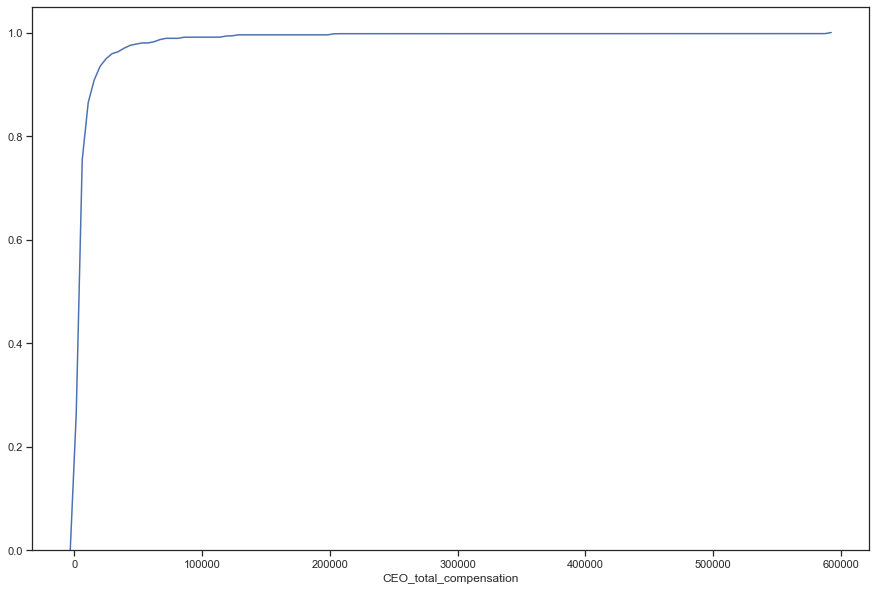

In [58]:
#plotting ecdf using seaborn
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(totcomp, kde_kws=dict(cumulative=True))
plt.show()

Creating necessary function to compute ECDF and inverse

In [5]:
def ecdf(sample, x, inverse=False):
    if inverse==False:
        #count length of sample
        len_sample = sample.shape[0]
        #count values before x in sample
        count_x = sample[sample <= x].shape[0]
        y = count_x / len_sample
    else:
        y = sample.quantile(x)
    return y

Computing ECDF and its inverse:

$
(i)
$
$
\hat F^{-1}(0.1):
$

In [6]:
ecdf(totcomp,0.1,inverse=True)

1002.4000000000001

$
(i)
$
$
\hat F^{-1}(0.9):
$

In [7]:
ecdf(totcomp,0.9,inverse=True)

15046.000000000004

$
(ii)
$
$
\hat F(2000):
$

In [8]:
ecdf(totcomp,2000)

0.34451901565995524

$
(ii)
$
$
1 - \hat F(4000):
$

In [9]:
1 - (ecdf(totcomp,4000))

0.3847874720357942

Economic interpretation:

1) 0.1 fraction of CEO total compensations from sample are less than or equal to 1002.2;

2) 0.9 fraction of CEO total compensations from sample are less than or equal to 15060.5;

3) 0.34 fraction of CEO total compensations from sample are less than or equal to 2000;

4) Only 0.38 fraction of CEO total compensations from sample are more than 4000.

#### (c) Plot the histogram of $totcomp$ and the Box-plot (or violin-plot). What can be concluded about the distribution of the data? Are the location measures computed above still appropriate? Compute and discuss an appropriate measure of symmetry.

Histogram plotting:

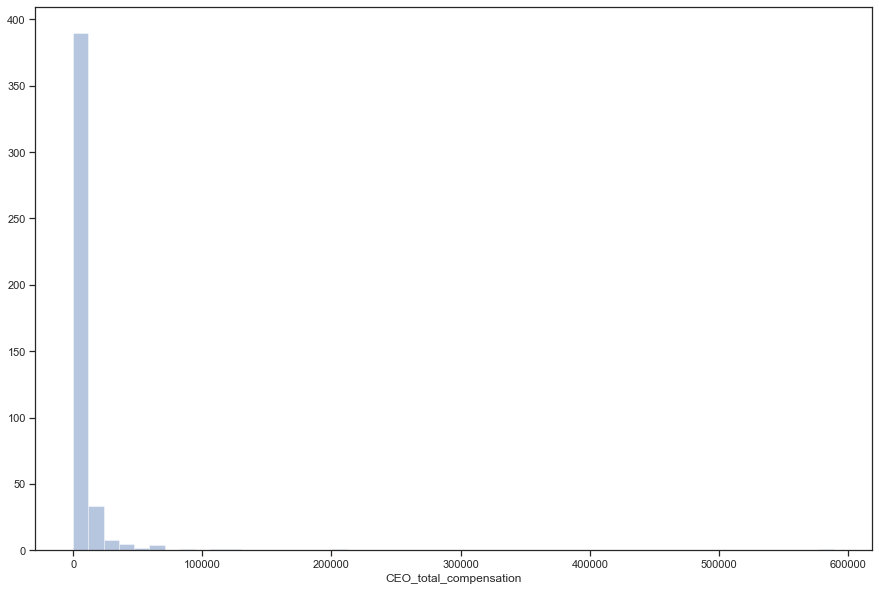

In [59]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(totcomp,kde=False)
plt.show()

Boxplot plotting:

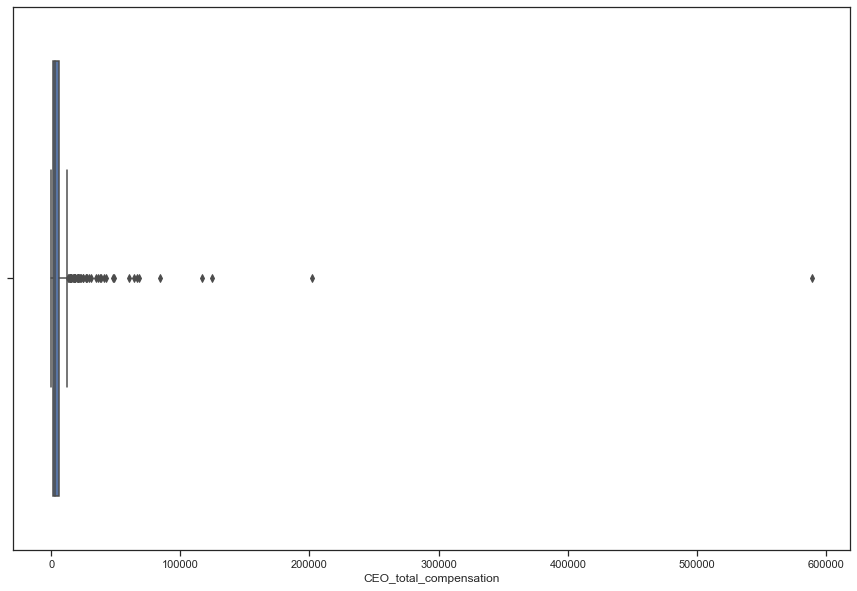

In [60]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(totcomp)
plt.show()

Observation about distribution:

- Distribution of data is highly skewed to right (positive skewness);

- Interquartile range (IQR) would be a better measure of variability for this data in comparison to standard deviation because the latter could overstate variability in the case of outliers.

Are the location measures computed above still appropriate(?):

- Mean is not an approapriate location measure for such data if we want to know central tendency among most number of CEOs. In our case mean is inflated and much greater than median and trimmed mean (BTW, there can be exceptions when in right-skewed data mean is lesser than median, but our case is more about general rule of thumb);

- Instead, median and trimmed mean measures are more effective here as they largely ignore right tail (outliers) and are less inflated;

- Nevertheless, mean is always useful to know in order to compare it to median and trimmed mean.

Computing and discussing an appropriate measure of symmetry (skewness):

- We've already seen that our data is not symmetric. In order to compute level of 'non-symmetry' or skewness of the sample we can use adjusted Fisher-Pearson standardized moment coefficient. 

- The formula is rather long to rewrite it here and can be found at https://en.wikipedia.org/wiki/Skewness#Sample_skewness

- It is implemented under the hood of pandas 'skew()' function.

Computing skewness:

In [12]:
totcomp.skew()

14.846354794940227

#### (d) Check which method is used in your software to compute the optimal bandwidth (or the number of bars) in the histogram. Describe it shortly here. Make plots of too detailed and too rough histograms. What can we learn from these figures?

Method in seaborn (matplotlib functionality) that was used to find optimal bandwidth outputs maximum of the ‘sturges’ and ‘freedman-diaconis’ estimators.

Describe method shortly:

Sturges method computes optimal bandwidth 'k' in following manner:

$
k = [\log _{2}n]+1
$

Freedman-Diaconis computes optimal bandwidth 'k' in following manner:

$
2 \times \frac{IQR(x)}{\sqrt[3]{n}}
$

Making plots of too detailed histogram:

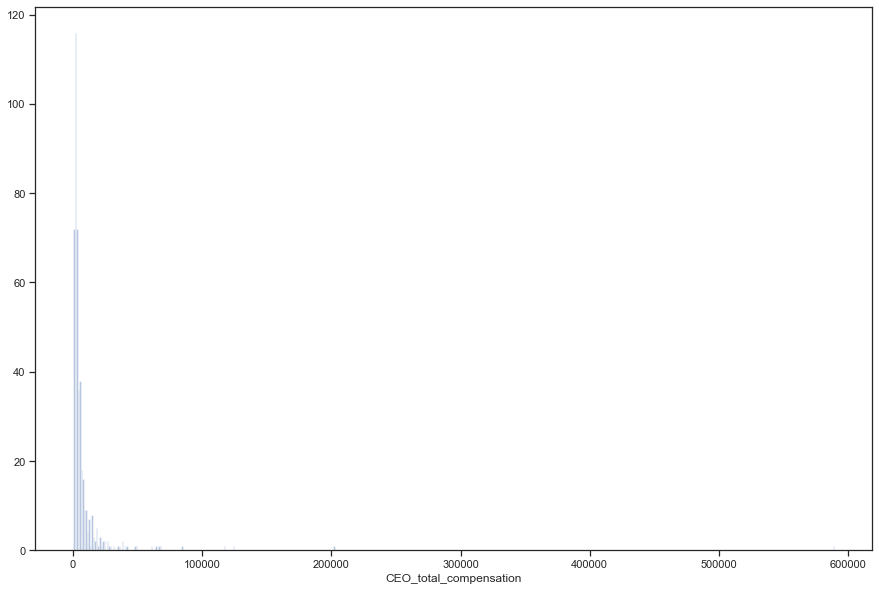

In [61]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(totcomp, bins = 500,kde=False)
plt.show()

Making plots of too rough histograms:

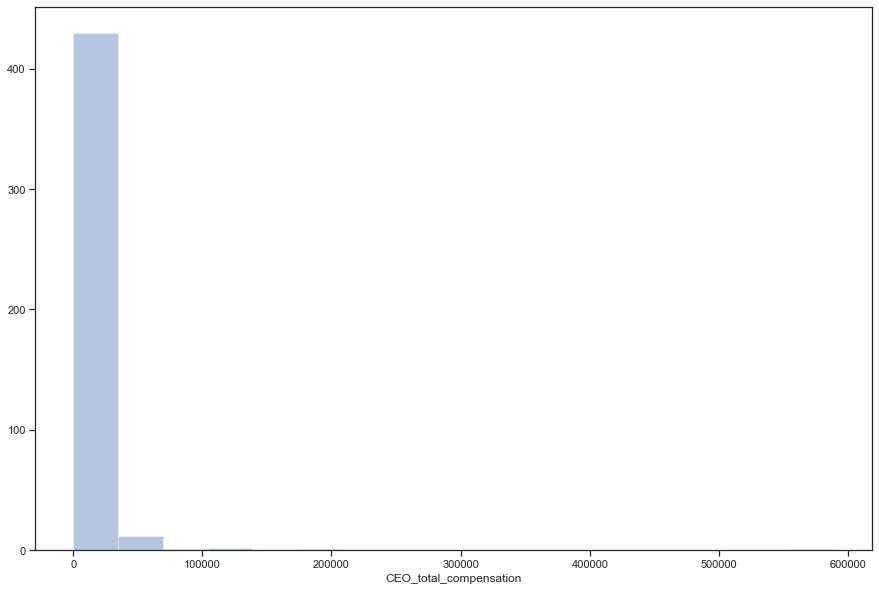

In [62]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(totcomp, bins = 'doane',kde=False)
plt.show()

What can we learn from these figures:

- too detailed histogram helps us to capture existence of skewness and peaks but it hard to see reasonably large chunk of data where the most values are concentrated (hard to see mean);

- too rough histogram us can't differentiate between values at all.

#### (a) We suspect that the total compensation of the CEO and other variables are related. Compute the correlation coefficients of Pearson and plot them as a heatmap (correlation map). Discuss the strength of the correlations.

Computing the correlation coefficients of Pearson and plotting them as a heatmap.

In [15]:
pearson_r = df_ceo.corr(method='pearson')

Heatmap:

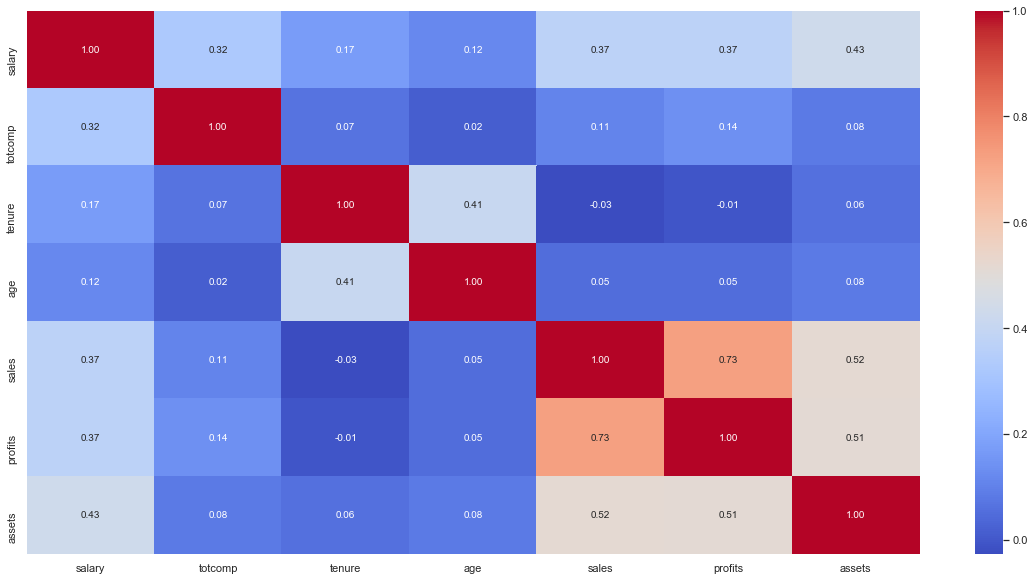

In [16]:
#Plot figsize
fig, ax = plt.subplots(figsize=(20, 10))
#Generate Color Map
sns.heatmap(pearson_r,cmap='coolwarm', annot=True, fmt=".2f")
#show plot
plt.show()

Discuss the strength of the correlations:
- We can conclude that a relatively strong correlation exist only between 'profits' and 'sales' variables;
- In general, most variables are weakly correlated;

#### b) Plot the scatter plots. Conclude if the linear correlation coefficientsare appropriate here. Compute now the Spearman’s correlations and make a heatmap. Compare the results with Pearson. What is the rank of the observation totcomp= 6000?

Plotting the scatter plots:

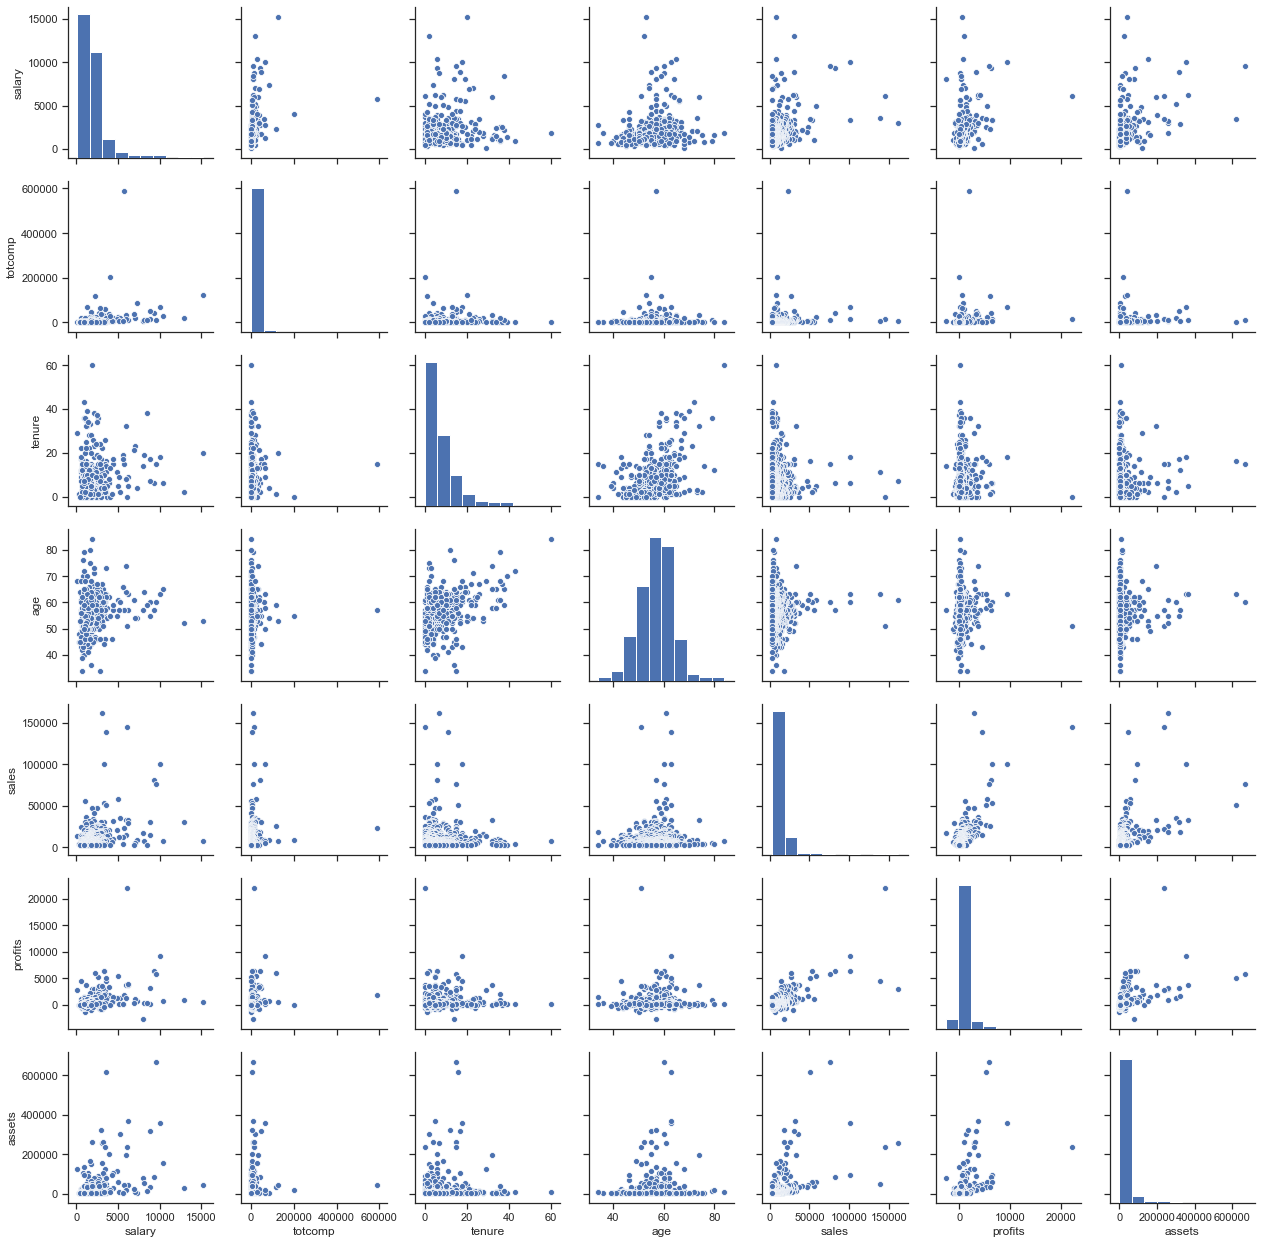

In [17]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_ceo)
plt.show()

Conclude if the linear correlation coefficients are appropriate here:
- linear correlation coefficients are not appropriate here, as generally no linear relationships are revealed on scatter plots. 
- even in above-mentioned 'strong' case between variables 'profits' and 'sales' relationship is obviously non-linear on the scatter plot.

Computing the Spearman’s correlations and making a heatmap:

In [18]:
spearman = df_ceo.corr(method='spearman')

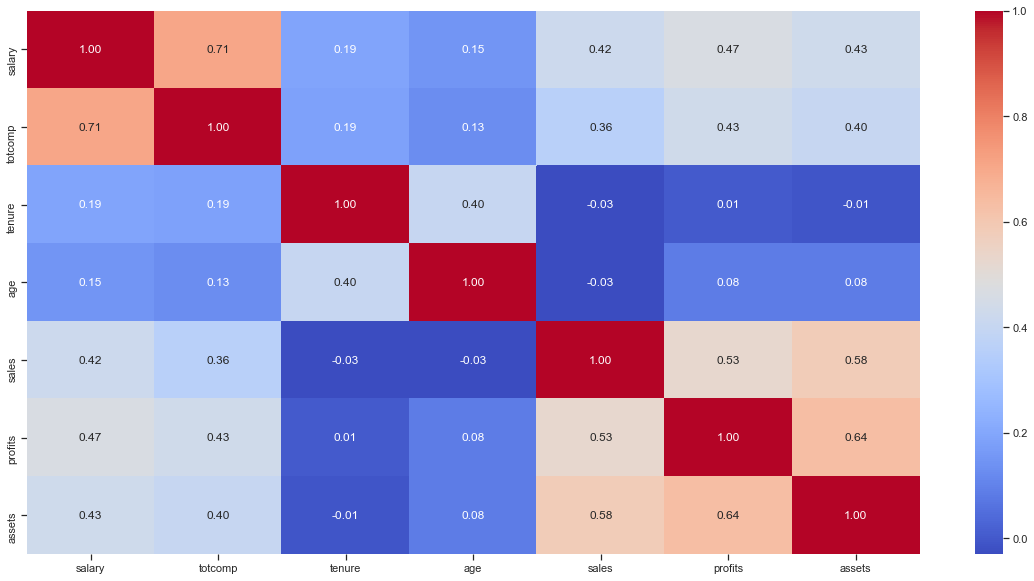

In [19]:
#Plot figsize
fig, ax = plt.subplots(figsize=(20, 10))
#Generate Color Map
sns.heatmap(spearman,cmap='coolwarm', annot=True, fmt=".2f")
#show plot
plt.show()

Compare the results with Pearson:
- As in Pearson case, in Spearman most variables also are weakly correlated;
- Interestingly, in pairs 'assets'-'sales', 'assets'-'profits', 'sales'-'profits' Spearman correlation coefficient is bigger than Pearson's. And its absolutely explainable, as in scatter plots above we see monotonic relationship between these variables (i.e. variables tend to move in the same direction and not necessarily with the same rate). This way we can see some advantage of Spearman coef. over Pearson coef.

What is the rank of the observation totcomp= 6000?

There is no such an observation. Therefore, I will use first observation after 6000:

In [20]:
observation_after_6000 = df_ceo.loc[df_ceo['totcomp']>6000]['totcomp'].sort_values().to_list()[0]
print('Observation is:',observation_after_6000)
rank = df_ceo['totcomp'].sort_values().to_list().index(observation_after_6000)+1
print('Rank of  the observation is:',rank)

Observation is: 6033
Rank of  the observation is: 335


#### (c) Consider the two subsamples: CEOs younger than 50 and older than 50. Plot for both subsamples overlapping histograms/ecdf’s and discuss the results. What can we learn from the corresponding location and dispersion (!) measures?

Extracting subsamples:

In [21]:
younger_ceo = df_ceo.loc[df_ceo['age']<50]['totcomp']
older_ceo = df_ceo.loc[df_ceo['age']>=50]['totcomp']

Plotting overlapping histograms of both subsamples:

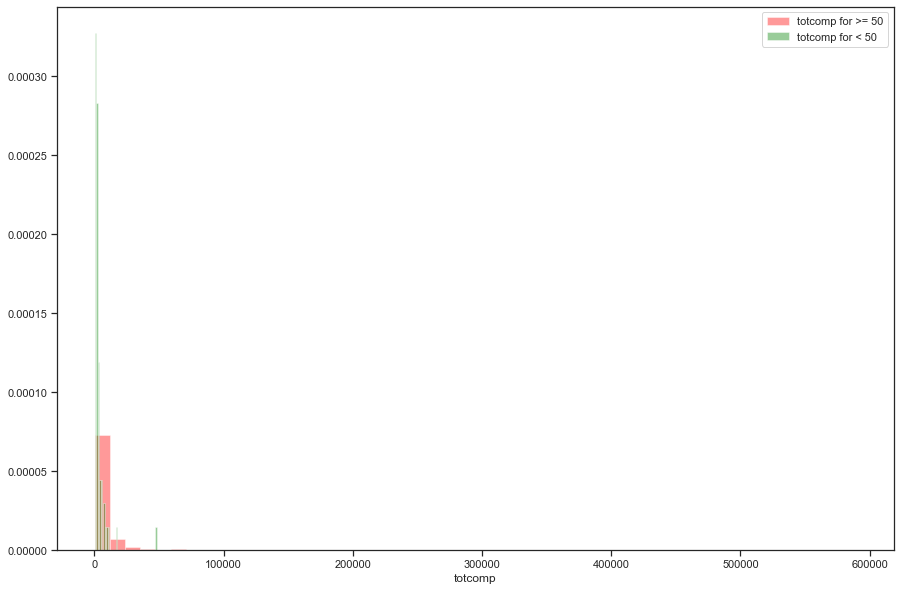

In [63]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(older_ceo,norm_hist=True, kde=False,label='totcomp for >= 50', color='red')
sns.distplot(younger_ceo,norm_hist=True,kde=False, label='totcomp for < 50', color='green')
plt.legend()
plt.show()

Plot overlapping ecdf for both subsamples:

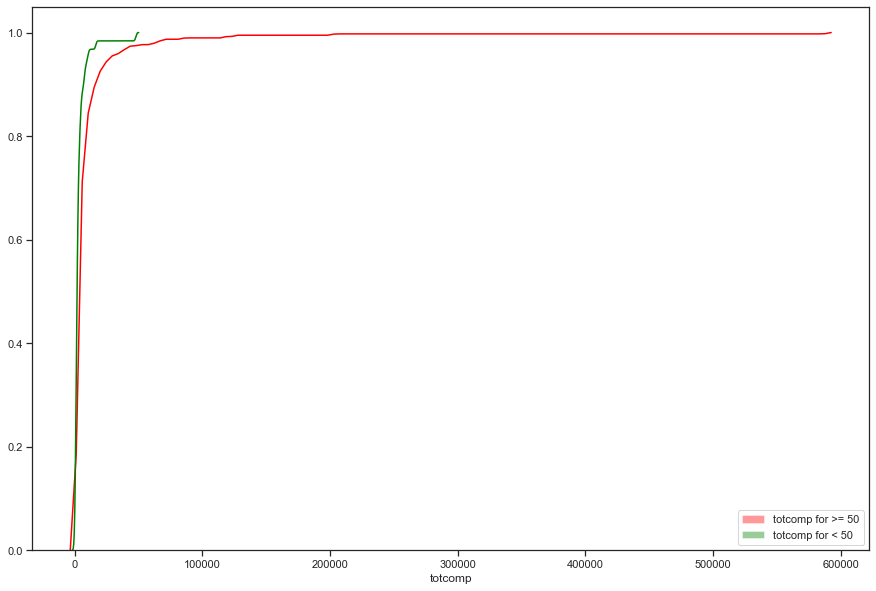

In [64]:
#plotting ecdf using seaborn
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(older_ceo, kde_kws=dict(cumulative=True),label='totcomp for >= 50', color='red')
sns.distplot(younger_ceo, kde_kws=dict(cumulative=True),label='totcomp for < 50', color='green')
plt.legend()
plt.show()

Discuss the results. What can we learn from the corresponding location and dispersion (!) measures?

- We can clearly see from ECDF that the dispersion for the group 'age >= 50' is much bigger than for group 'age < 50'. We can check it by computing and comparing variance and IQR for both subsamples: 

In [24]:
print('Variance of total compensation for CEO under 50:',younger_ceo.var())
print('Interquartile range of total compensation for CEO under 50:',(younger_ceo.quantile(0.75)-younger_ceo.quantile(0.25)))
print('')
print('Variance of total compensation for CEO older or equal to 50:',older_ceo.var())
print('Interquartile range of total compensation for CEO older or equal to 50:',(older_ceo.quantile(0.75)-older_ceo.quantile(0.25)))

Variance of total compensation for CEO under 50: 41177054.61792701
Interquartile range of total compensation for CEO under 50: 2167.25

Variance of total compensation for CEO older or equal to 50: 1146711227.6469147
Interquartile range of total compensation for CEO older or equal to 50: 4858.0


- We can also conclude from ECDF and histogram that for these subsamples that mean and median total compensation is bigger for the group 'age >= 50'. We can show it also by computing and comparing mean and median: 

In [25]:
print('Mean total compensation for CEO under 50:',younger_ceo.mean())
print('Median total compensation for CEO under 50:',younger_ceo.median())
print('')
print('Mean total compensation for CEO older or equal to 50:',older_ceo.mean())
print('Median total compensation for CEO older or equal to 50:',older_ceo.median())

Mean total compensation for CEO under 50: 3459.8548387096776
Median total compensation for CEO under 50: 1819.0

Mean total compensation for CEO older or equal to 50: 9125.961038961039
Median total compensation for CEO older or equal to 50: 3161.0


### 3.Consider another grouping of the data. Define the groups: $
\begin{cases}
S_1: \text{salary} < 3000 \\ 
S_2: 5000 > \text{salary} >= 3000  \\
S_3: {salary} >= 5000
\end{cases}
;
\begin{cases}
A_1: \text{age} < 50 \\ 
A_2: \text{age} >= 50
\end{cases}
$

Define filters according to above criterions in order to apply them on CEO dataset:

In [26]:
def filter_salary(salary):
    if salary < 3000:
        return 'less than 3000'
    elif salary < 5000 and salary >= 3000:
        return 'less than 5000 AND more or equal to 3000'
    else:
        return 'more or equal to 5000'

def filter_age(age):
    if age < 50:
        return 'less than 50'
    else:
        return 'more than 50'
    

Filtering of our data to get two new categorical columns of dataset as a result:

In [27]:
df_ceo['grouped_sal'] = df_ceo['salary'].apply(filter_salary)
df_ceo['grouped_age'] = df_ceo['age'].apply(filter_age)

#### (a) Aggregate the data to a 2 × 3 contigency table with absolute and with relative frequencies.

Creating 2 contingency tables with marginals:

In [28]:
abs_contingency_table = pd.crosstab(df_ceo['grouped_age'], df_ceo['grouped_sal'], margins = True,margins_name='Marginals') 
rel_contingency_table = pd.crosstab(df_ceo['grouped_age'], df_ceo['grouped_sal'], margins = True,margins_name='Marginals',normalize=True) 

Show absolute and relative contingency tables:

In [29]:
abs_contingency_table

grouped_sal,less than 3000,less than 5000 AND more or equal to 3000,more or equal to 5000,Marginals
grouped_age,,,,
less than 50,59,3,0,62
more than 50,323,37,25,385
Marginals,382,40,25,447


In [30]:
rel_contingency_table

grouped_sal,less than 3000,less than 5000 AND more or equal to 3000,more or equal to 5000,Marginals
grouped_age,,,,
less than 50,0.131991,0.006711,0.000000,0.138702
more than 50,0.722595,0.082774,0.055928,0.861298
Marginals,0.854586,0.089485,0.055928,1.000000


#### (b) Give interpretation for the values of $n_{12}$ , $h_{12}$ , $n_{1·}$ and $h_{1·}$ .

- $n_{12}$ is 3 and gives amount of CEOs,which age is less than 50 and income is less than 5000 AND more or equal to 3000;
- $h_{12}$ has the same meaning, just divided by marginals of 62;
- $n_{1·}$ is 62 - marginal absolute frequency for CEOs whose age is less than 50.
- $h_{1·}$ is 0.1387 - marginal relative frequency for CEOs whose age is less than 50.

#### (c) Compute an appropriate dependence measure for $S_i$ and $A_j$ . What can be concluded from its value?

In [31]:
from scipy.stats import chi2_contingency
#chi2 = chi2_contingency(abs_contingency_table)[0]

We will use formula for corrected contingency coefficient of Pearson based on contingency coefficient of Pearson:

$
C
=
\sqrt{X^2/(X^2+n)}
$

$
C_{corr} = \sqrt{X^2/(X^2 + n)}/\sqrt{(2 - 1)/2}
$

In [32]:
chi2 = chi2_contingency(abs_contingency_table.iloc[:2, :3])[0]
chi2_corr = np.sqrt(chi2/(chi2 + df_ceo.shape[0]))/np.sqrt((2 - 1)/2)
print(chi2_corr)

0.16511784660387943


As we see, dependence measure is close to zero and therefore relationship is weak between age and total compensation. Let's check its significance p-value of simple uncorrected chi2:

In [33]:
chi2_contingency(abs_contingency_table.iloc[:2, :3])[1]

0.04555439285539869

Wee see that it's <0.05 and significant.

# Problem 2

### 1. Simulate (with a fixed seed) a sample of size n = 100 from the normal distribution with $μ_1$ = 10 and $σ_1^{2}$ = 9.

Writing a function to simulate the distribution. 

In [34]:
def sampling_normal(mean, variance, size):
    return np.random.normal(loc=mean, scale=variance, size=size)

Simulating sample of size 100 from $N(10,9)$ with a fixed seed.

In [35]:
#fixed seed 
np.random.seed(42)
#size of sample
n = 100
#mean of normal distr
mean = 10
#variance of normal distr
var = 9
# simulating sample from above-defined normal distribution with n=100
sample_norm_1 = sampling_normal(mean,var,n)

#### (a) Plot the histogram and compare it to the density of N (10, 9).

In order to compare histogram of the simulated distribution with $N(10,9)$ density plot we also need to generate points, which could represent such density.

We can do this, by doing two steps:

1. Generating array of reasonably possible values of normally distributed random variable X, using the fact, that 99.7 % of values x, s.t. $x \in X$, are located 3 standard deviations below and above the mean of X. We than subtract/add 100 from/to both points, so that we will not miss remaining data. Thus,we will have our endpoints.

2. Inputing generated array to 'stats.norm.pdf' function which outputs normal distribution probability density evaluated for each value of input, given mean and variance.


In [36]:
#let's find standard deviation
std=np.sqrt(var)
#let's generated end values of X on both tails
left_tail_last = mean - 3*std-50
right_tail_last = mean + 3*std+50
X = np.linspace(left_tail_last, right_tail_last, n)
density = stats.norm.pdf(X, loc=mean, scale=var)

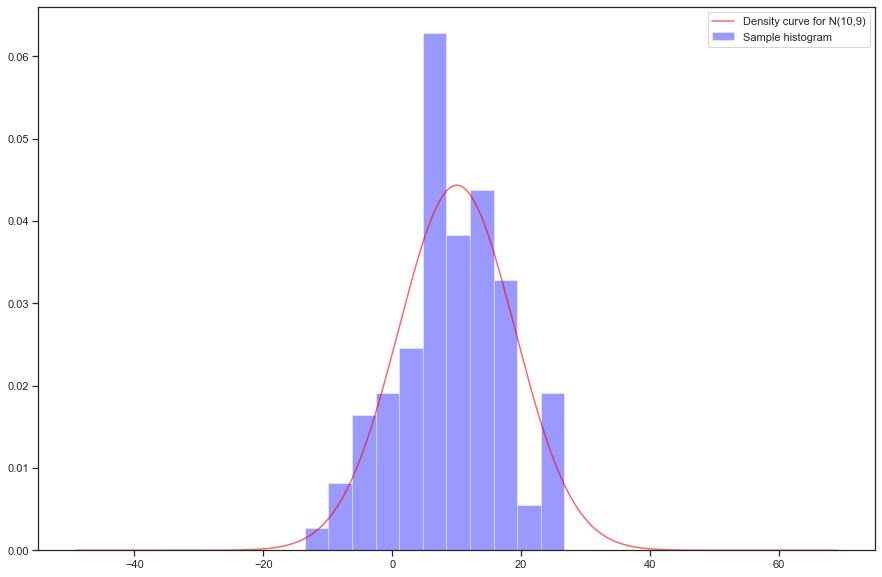

In [65]:
fig, ax = plt.subplots(figsize=(15, 10))
#plot histogram of our sample
sns.distplot(sample_norm_1, bins='fd', kde=False, norm_hist=True, label='Sample histogram', color='blue')
#plot density curve over histogram
_ = sns.lineplot(x=X, y=density, label='Density curve for N(10,9)', color='red',alpha=0.6)

Histogram doesn't look very symmetric in comparison to density curve with n=100, but we are guaranteed to approach true underlying distribution for n approaching positive infinity.

For example, let's try n=1000:

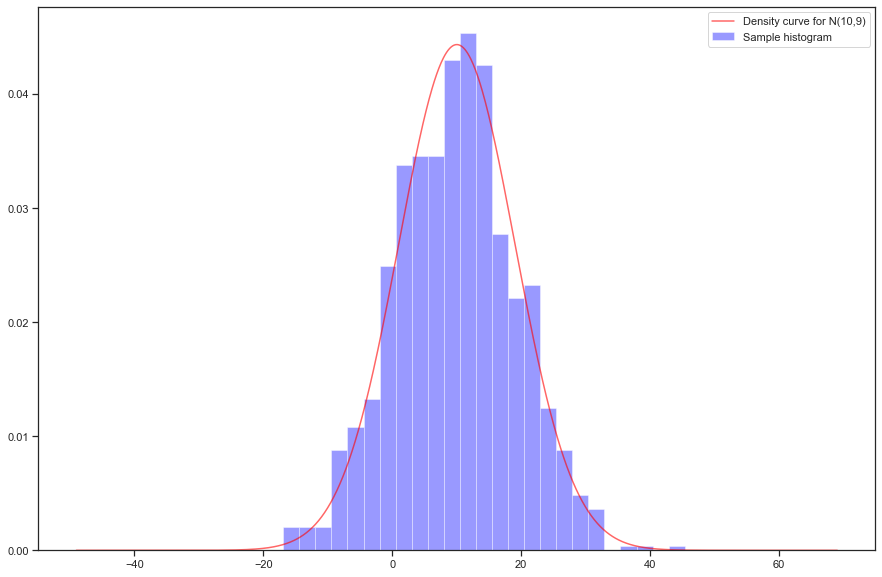

In [66]:
fig, ax = plt.subplots(figsize=(15, 10))

sample_norm_2 = sampling_normal(mean,var,size=1000)
std=np.sqrt(var)
left_tail_last = mean - 3*std-50
right_tail_last = mean + 3*std+50
X = np.linspace(left_tail_last, right_tail_last, 1000)
density = stats.norm.pdf(X, loc=mean, scale=var)
#plot histogram of our sample
_ = sns.distplot(sample_norm_2, bins='fd', kde=False, norm_hist=True, label='Sample histogram', color='blue')
#plot density curve over histogram
_ = sns.lineplot(x=X, y=density, label='Density curve for N(10,9)', color='red',alpha=0.6)

Now we see that for n=1000 histogram approximates density.

#### (b) Now draw a sample $y_i$ of size $n = 100$ from $t_5$ . Transform it as follows: $10+3 \times \sqrt{\frac{3}{5}} \times y_i$. Plot the histogram and compare the density of N (10, 9). What can be concluded and why this example might be relevant for empirical studies?

Simulating sample of size 100 from standard student distribution $t_5$ with degree of freedom equal to 5: 

In [39]:
def sampling_student(df,size):
    return np.random.standard_t(df=df, size=size)    

In [40]:
sample_student = sampling_student(5,100)

Transforming sample:

In [41]:
def transform_sample(sample):
    return 10 + 3*np.sqrt(3/5)*sample

In [42]:
transformed_sample = transform_sample(sample_student)

Plotting the histogram and comparing it to the density of $N(10, 9)$.

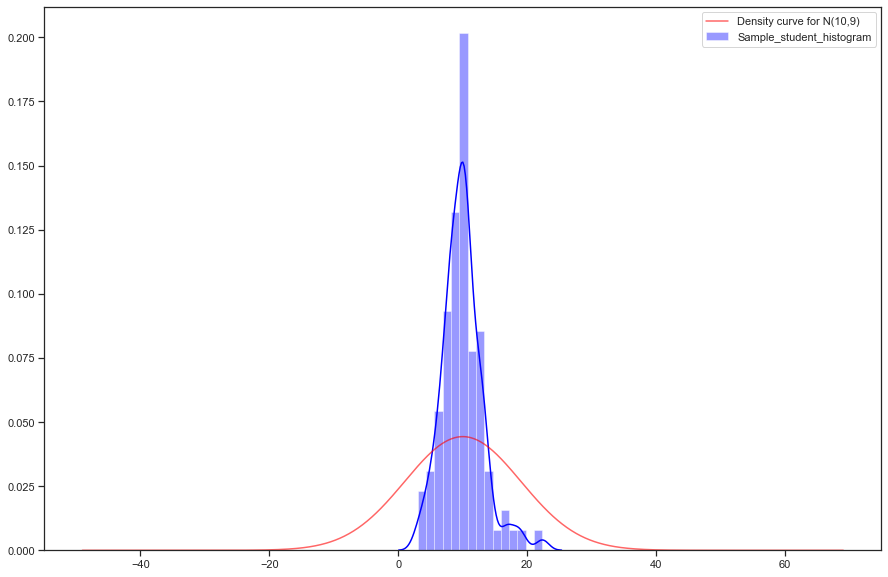

In [70]:
fig, ax = plt.subplots(figsize=(15, 10))

#plot histogram of our sample
sns.distplot(transformed_sample, bins='fd', norm_hist=True, label='Sample_student_histogram', color='blue')
#plot density curve over histogram
sns.lineplot(x=X, y=density, label='Density curve for N(10,9)', color='red',alpha=0.6)

We can conclude that transformed T-student distributed sample has approximately the same mean as N(10,9). That's understadable because there is a linearity of expectation and we actually shifted values from mean 0 to the right by 10 points. 

In [44]:
transformed_sample.mean()

9.935374436340934

But variance of our transformed sample is smaller. 

Generally, student distribution is used for smaller samples in empirical studies.

### 2. In practice the data is always very heterogenous. To reflect it we contaminate the data by adding an outlier or a subsample with different characteristics. 

#### a) To obtain a realistic heterogenous sample add to the original normal data a new sample of size $m$ simulated from $N(20, 2^2)$, i.e. $μ_2 = 20$ and $σ_2^{2} = 4$. The size $m$ will obviously influence the above measures. Vary $m$ from $10$ to $200$. (The resulting sample is said to stem from a mixture normal distribution).

As we don't have an instruction on exact $m$ to be tried I will generate $m$ in the range(10,200) in the interval of 40 between every $m$. With the aim to use it in further plotting I will do 'for' loop for every value of $m$ in that sequence: 

2) sample $m$ points from $N(20,4)$; 

3) add this two samples samples from $N(10,9)$ and $N(20,4)$ 

I will also create empty dataframe 'df_mixture' in order to add every mixture sample to distinct column of the dataframe in order to compare samples with different $m$ between each other with boxplots and histograms:

In [45]:
#creating empty dataframe 
df_mixture = pd.DataFrame()

#creating an array of m's for future usage
m_array = [10,50,90,130,170,200]

#looping through every m, using it in sampling function
for m in m_array:
    #sampling from our original distribution N(10,9)
    sample = sampling_normal(mean,var,100)
    #sampling from new distribution N(20,4)
    new_sample = sampling_normal(20,4,m)
    #define string to put it as a name of respective column if two dataframes
    name_col = 'm='+str(m)
    #creating mixture by adding original sample to 'noise'
    mixture = [*sample, *new_sample]
    df_mixture[name_col] = pd.Series(mixture)

#### (b) Plot Boxplots (or violin plots) and histograms for each subsample individually and for the sample for a few different values of m.

Plotting boxplots

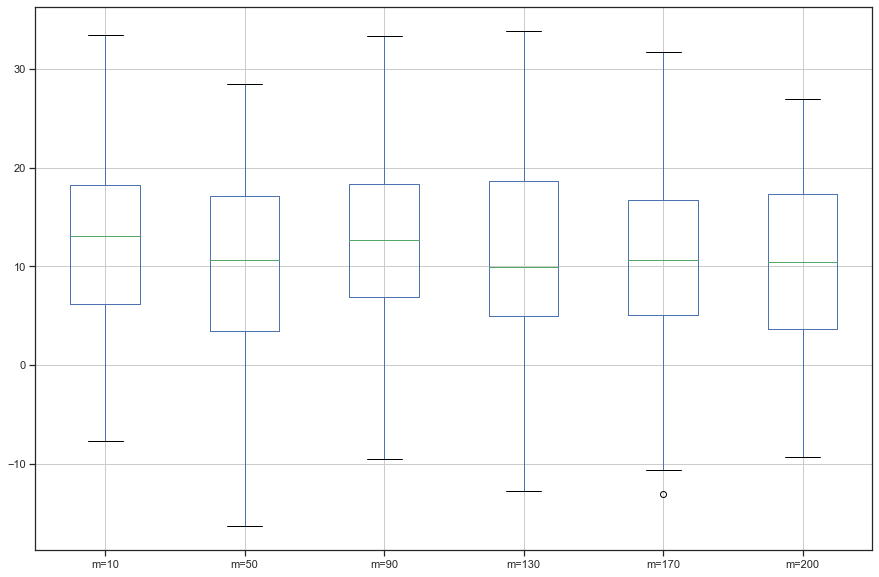

In [71]:
fig, ax = plt.subplots(figsize=(15, 10))

df_mixture.boxplot()
plt.show()

Plotting histograms

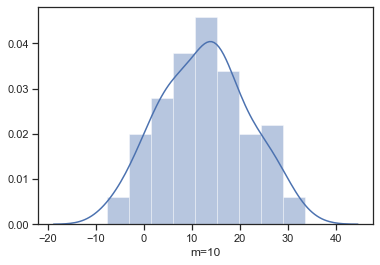

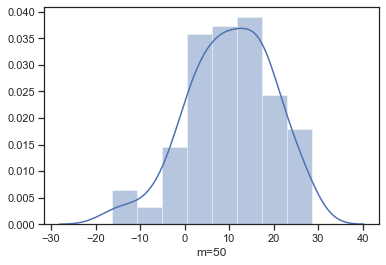

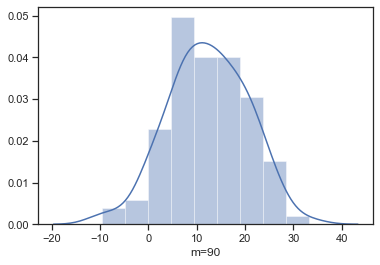

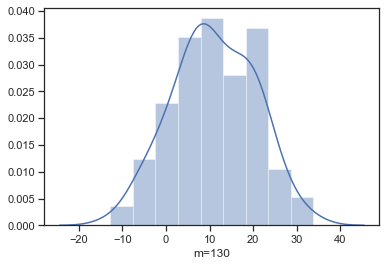

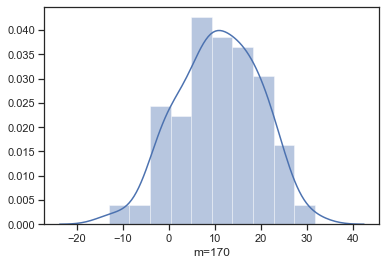

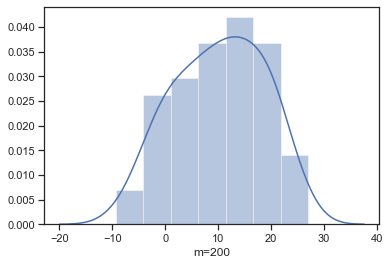

In [47]:
cols = df_mixture.columns
for col in cols:
    sns.distplot(df_mixture[col], norm_hist=True)
    plt.show()

#### (c) Make animated or interactive graphics (with manipulate, plotly, ggplot, etc.) to visualize the impact of m on the histogram and location measures (added as vertical lines in the graph) of the data.

One can change values of a by mouse in upper right after funning below code:

In [72]:
def m_interactive(m):
    col = 'm='+str(m)
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.axvline(df_mixture[col].mean(), color='red', label='mean')
    ax.axvline(df_mixture[col].quantile(0.25), color='yellow', label='25 quantile')
    ax.axvline(df_mixture[col].quantile(0.75), color='green', label='75 quantile')
    sns.distplot(df_mixture[col], norm_hist=True)
    _ = ax.legend()
    plt.show()
m_list=[10,50,90,130,170,200]
interact(m_interactive,m=m_list)

    

interactive(children=(Dropdown(description='m', options=(10, 50, 90, 130, 170, 200), value=10), Output()), _do…

<function __main__.m_interactive(m)>

### 3. Next step is to simulate two dependent data sets. We simulate two samples with a given value of the correlation coefficient.

#### (a) Let $U ∼ N(0,1)$ and $V ∼ N(0, 1)$. Let $U^{∗} = U$ and $V^{*} = ρ \times U + \sqrt{1 − ρ^2} \times V $. Prove that $Corr(U^{∗} , V^{∗}) = ρ$ and the variances of both variables $U^{∗}$ and $V^{∗}$ equal one.

Given general formula for correlation, ours formula is:

$
Corr(U^{∗},V^{∗}) = \frac{Cov(U^{*},V^{*})}{\sqrt{(Var(U^{*}),Var(V^{*}))}}
$

We should firstly find value of denominator, as its components $Var(U^{*})$ and $Var(V^{*})$ is also what we need to prove beforehand.

But we actually already know the value of $Var(U^{*})$. Because $U^{*} = U$ from $U ∼ N(0,1)$ we have $Var(U^{*}) = 1$. 

For $Var(V^{*})$ we need to recall that for arbitrary independent random variables $X$ and $Y$: $Var(X+Y) = Var(X)+Var(Y)$. R.V U and V are independent. 
It means that: 

$Var(V^{*}) = Var(ρ \times U + \sqrt{1 − ρ^2} \times V) = Var(ρ \times U)+Var(\sqrt{1 − ρ^2} \times V)$. 

Let's recall what happens to variance of arbitrary r.v. $X$ when we multiply it by constant $\alpha$: $Var(\alpha \times X) = \alpha^{2} \times Var(X)$. It means that:

$
Var(ρ \times U)+Var(\sqrt{1 − ρ^2} \times V) = p^{2} \times Var(U) + 1 - ρ^2 \times Var(V) = p^{2} \times 1 + 1 - ρ^2 \times 1 = 1.
$

Thus, $Var(V^{*}) = 1$

We see that 
$Var(V^{*}),Var(V^{*}) = 1$. It means that:
$Corr(U^{∗},V^{∗}) = {Cov(U^{*},V^{*})}$.
Given general formula for covariance, ours formula is:

$
{Cov(U^{*},V^{*})}
=
\mathbb{E}[(U^{*}-\mathbb{E}[U^{*}])(V^{*} - \mathbb{E}[V^{*}])]
=
\mathbb{E}[U^{*}V^{*}] - 2\mathbb{E}[U^{*}]\mathbb{E}[V^{*}] + \mathbb{E}[U^{*}]\mathbb{E}[V^{*}] = \mathbb{E}[U^{*}V^{*}] - \mathbb{E}[U^{*}]\mathbb{E}[V^{*}] = \mathbb{E}[U^{*}V^{*}]
=
\mathbb{E}[p \times U^2 + \sqrt{(1 - p^2)}VU]
=
\mathbb{E}[U^2] + (\sqrt{1-p^2}) \times \mathbb{E}[VU].
$
We know that for independent r.v. X and Y $\mathbb{E}[X*Y] = 0$. It means that:

$
\mathbb{E}[U^2] + (\sqrt{1-p^2}) \times \mathbb{E}[VU]
=
\mathbb{E}[U^2]
=
\mathbb{E}[U - \mathbb{E}[U]]^2 = Var(U) = 1
$.

Thus $p$ = 1.


#### b) Use the above idea to simulate two samples of size $n = 100$ from a normal distribution with different values of $ρ$. Compute the correlation coefficients of Pearson and of Spearman. Compare the correlation to the original parameter $ρ$ (for example, plot Pearson vs. $ρ$ and Spearman vs. $ρ$).

We firstly need to write a function to process values of samples from normal distributions and generating new samples,given different values of $p$:

In [49]:
def generate_distr(U, V, p):
    new_sample = p*U + (np.sqrt(1 - p**2))*V
    return new_sample

Generating new samples from normal distributions:

In [50]:
U = np.random.normal(loc=0, scale=1, size=100)
V = np.random.normal(loc=0, scale=1, size=100)

In [51]:
#creating array of different p
array_p = np.arange(0., 0.9, 0.1)
#generating new samples
new_samples = [generate_distr(U, V, p) for p in array_p]
#getting our coefficients for each new sample
pears_coef = [np.corrcoef(U, new_sample)[0, 1] for new_sample in new_samples]
spears_coef = [stats.spearmanr(U, new_sample).correlation for new_sample in new_samples]

Plotting Pearson vs.  ρ  and Spearman vs.  ρ:

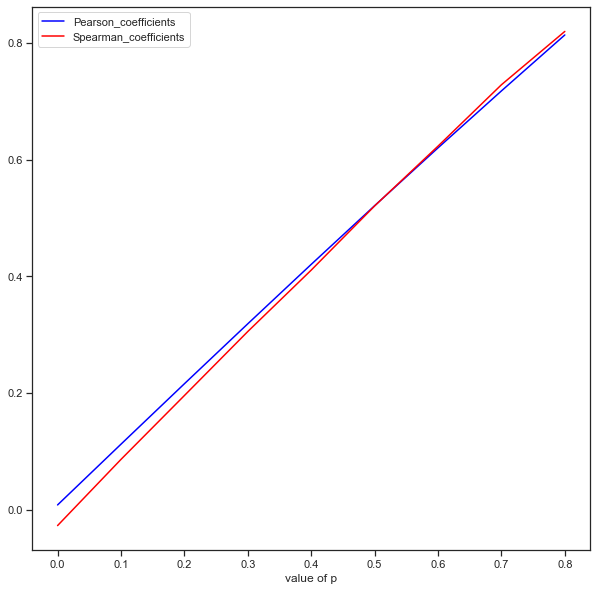

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(array_p, pears_coef, label='Pearson_coefficients', color='blue')
sns.lineplot(array_p, spears_coef, label='Spearman_coefficients', color='red')
plt.xlabel('value of p')
plt.show()

We see on limited size samples that p approximately equal to Pearson coefficient. Spearman coefficient also approximates Pearson. It can be explained because we transformed r.v in linear monotone manner.

#### (c) Make a nonlinear but monotone transformation of $V^{∗}$ , say $exp$ for simplicity. Check the impact of this transformation on the correlation coefficients of Spearman and Pearson. Think about an appropriate visualization of the findings.

In [53]:
new_samples = [np.exp(generate_distr(U, V, p)) for p in array_p]

Computing coefficients:

In [54]:
pears_coef = [np.corrcoef(U, new_sample)[0, 1] for new_sample in new_samples]
spears_coef = [stats.spearmanr(U, new_sample).correlation for new_sample in new_samples]

Plotting:

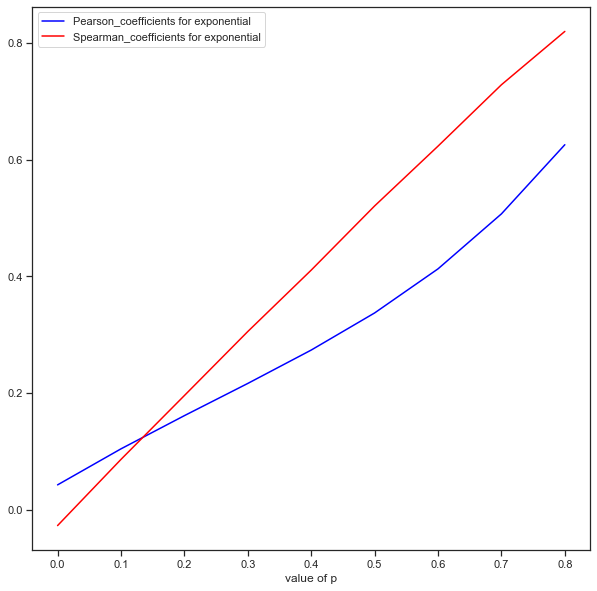

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(array_p, pears_coef, label='Pearson_coefficients for exponential', color='blue')
sns.lineplot(array_p, spears_coef, label='Spearman_coefficients for exponential', color='red')
plt.xlabel('value of p')
plt.show()

Spearman correlation looks better in capturing exponential transformation, than Person, given former's monotonicity and latter's weakness to non-linearity.